In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.spatial.distance as ssd
import datetime as dt
import meteostat
import scipy.stats

In [2]:
metadata = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/Plates_1_to_4_metadata_merged_luke.csv",
    index_col=0,
)
metadata = metadata.drop(
    columns=[
        "arb.sort",
        "sample-id",
        "Ambiguous Unstranded",
        "Ambiguous Forward",
        "Multimapping",
        "Unmapped Over Mapped",
    ]
)
metadata["Date and Time"] = metadata["date"] + " " + metadata["time"]
luke_time_data_format = "%-m/%-d/%y %-H:%-M"
metadata["Date and Time"] = pd.to_datetime(
    metadata["Date and Time"], format=luke_time_data_format
)

In [3]:
otu_data = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/Soil_microbiome_seperated/otu_table.csv",
    index_col=0,
)
otu_data

,LIC001,LIC002,LIC003,LIC004,LIC005,LIC006,LIC007,LIC008,LIC009,LIC010,...,LIC747,LIC748,LIC749,LIC750,LIC751,LIC752,LIC753,LIC754,LIC755,LIC756
MJ020-1-barcode34-umi54826bins-ubs-9,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
GB-GCA-001580565.1-LRBF01000062.1,0.000000,0.904662,0.000000,0.000000,0.000000,0.0,0.0,0.093442,0.624142,0.401125,...,0.0,0.0,0.0,0.111166,0.0,0.0,0.918739,0.250906,2.163928,0.526914
MJ034-2-barcode60-umi6847bins-ubs-34,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
GB-GCA-000648395.1-JDVY01000074.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.193484,0.231819,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
GB-GCA-016716805.1-JADJUX010000001.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MJ033-1-barcode44-umi11398bins-ubs-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
MJ032-1-barcode26-umi72172bins-ubs-3,0.000000,0.171654,0.098383,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.065118,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
KC511070,0.165061,0.000000,0.150854,0.061662,0.069721,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
AJ833647,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [4]:
taxa_table = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/Soil_microbiome_seperated/taxa_table.csv",
    index_col=0,
)
taxa_table

,Kingdom,Phylum,Class,Order,Family,Genus,Species
MJ020-1-barcode34-umi54826bins-ubs-9,d__Bacteria,Chloroflexota,Dehalococcoidia,Dehalococcoidia Class,Dehalococcoidia Class,Dehalococcoidia Class,Dehalococcoidia Class
GB-GCA-001580565.1-LRBF01000062.1,d__Bacteria,Pseudomonadota,Gammaproteobacteria,Burkholderiales,Burkholderiaceae_A_595421,Caballeronia,Caballeronia pedi
MJ034-2-barcode60-umi6847bins-ubs-34,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Paracaedibacterales,Paracaedibacteraceae,Paracaedibacteraceae Family,Paracaedibacteraceae Family
GB-GCA-000648395.1-JDVY01000074.1,d__Bacteria,Actinomycetota,Actinomycetes,Mycobacteriales,Mycobacteriaceae,Mycobacterium,Mycobacterium shinjukuense
GB-GCA-016716805.1-JADJUX010000001.1,d__Bacteria,Pseudomonadota,Gammaproteobacteria,Burkholderiales,Rhodocyclaceae,Rhodocyclaceae Family,Rhodocyclaceae Family
...,...,...,...,...,...,...,...
MJ033-1-barcode44-umi11398bins-ubs-26,d__Bacteria,Bdellovibrionota_473306,UBA1018,UBA1018,UBA1018,GWA1-52-35,GWA1-52-35 sp001769805
MJ032-1-barcode26-umi72172bins-ubs-3,d__Bacteria,Pseudomonadota,Gammaproteobacteria,Burkholderiales,Burkholderiaceae_A_595421,Rugamonas_570800,Duganella zoogloeoides
KC511070,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Rhizobiales_505101,Beijerinckiaceae,Methylobacterium,Psychroglaciecola arctica
AJ833647,d__Bacteria,Myxococcota_A_473307,Polyangia_463783,Polyangiales,Polyangiaceae,Byssovorax,Byssovorax cruenta


In [5]:
luke_samp_data = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/Soil_microbiome_seperated/sam_data_table.csv",
    index_col=0,
)
luke_samp_data["Date and Time"] = luke_samp_data["date"] + " " + luke_samp_data["time"]
luke_samp_data["Date and Time"] = pd.to_datetime(
    luke_samp_data["Date and Time"], format=luke_time_data_format
)
luke_samp_data

,sample.type,timepoint,date,time,platename,daysincestart,Date and Time
LIC001,plant,t01,11/1/23,8:00,LIC_01,0,2023-11-01 08:00:00
LIC002,plant,t01,11/1/23,8:00,LIC_01,0,2023-11-01 08:00:00
LIC003,plant,t01,11/1/23,8:00,LIC_01,0,2023-11-01 08:00:00
LIC004,plant,t01,11/1/23,8:00,LIC_01,0,2023-11-01 08:00:00
LIC005,plant,t01,11/1/23,8:00,LIC_01,0,2023-11-01 08:00:00
...,...,...,...,...,...,...,...
LIC752,plant,c2_t13,3/3/24,20:00,LICCIRC_04,123,2024-03-03 20:00:00
LIC753,soil,c2_t13,3/3/24,20:00,LICCIRC_04,123,2024-03-03 20:00:00
LIC754,soil,c2_t13,3/3/24,20:00,LICCIRC_04,123,2024-03-03 20:00:00
LIC755,soil,c2_t13,3/3/24,20:00,LICCIRC_04,123,2024-03-03 20:00:00


In [6]:
soil_metadata = luke_samp_data.loc[luke_samp_data["sample.type"] == "soil"]
soil_metadata

,sample.type,timepoint,date,time,platename,daysincestart,Date and Time
LIC009,soil,t01,11/1/23,8:00,LIC_01,0,2023-11-01 08:00:00
LIC010,soil,t01,11/1/23,8:00,LIC_01,0,2023-11-01 08:00:00
LIC011,soil,t01,11/1/23,8:00,LIC_01,0,2023-11-01 08:00:00
LIC012,soil,t01,11/1/23,8:00,LIC_01,0,2023-11-01 08:00:00
LIC021,soil,t02,11/7/23,8:00,LIC_01,6,2023-11-07 08:00:00
...,...,...,...,...,...,...,...
LIC744,soil,c2_t12,3/3/24,16:00,LICCIRC_04,123,2024-03-03 16:00:00
LIC753,soil,c2_t13,3/3/24,20:00,LICCIRC_04,123,2024-03-03 20:00:00
LIC754,soil,c2_t13,3/3/24,20:00,LICCIRC_04,123,2024-03-03 20:00:00
LIC755,soil,c2_t13,3/3/24,20:00,LICCIRC_04,123,2024-03-03 20:00:00


In [7]:
def pairwise_braycurtis_long(vectors, labels):
    """
    Calculate Bray-Curtis distance between all pairs of vectors.

    Parameters:
    vectors : array-like
        2D array where each row is a sample vector
    labels : list, optional
        Labels for each vector. If None, uses integer indices.

    Returns:
    pd.DataFrame
        Long-format DataFrame with columns: sample1, sample2, distance
    """
    vectors = np.array(vectors)
    n = len(vectors)

    results = []
    for i in range(n):
        for j in range(i + 1, n):
            dist = ssd.braycurtis(vectors[i], vectors[j])
            results.append(
                {"sample1": labels[i], "sample2": labels[j], "distance": dist}
            )

    return pd.DataFrame(results)

In [9]:
table_with_id = otu_data.merge(taxa_table[["Genus"]], left_index=True, right_index=True)
table_with_id

,LIC001,LIC002,LIC003,LIC004,LIC005,LIC006,LIC007,LIC008,LIC009,LIC010,...,LIC748,LIC749,LIC750,LIC751,LIC752,LIC753,LIC754,LIC755,LIC756,Genus
MJ020-1-barcode34-umi54826bins-ubs-9,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,Dehalococcoidia Class
GB-GCA-001580565.1-LRBF01000062.1,0.000000,0.904662,0.000000,0.000000,0.000000,0.0,0.0,0.093442,0.624142,0.401125,...,0.0,0.0,0.111166,0.0,0.0,0.918739,0.250906,2.163928,0.526914,Caballeronia
MJ034-2-barcode60-umi6847bins-ubs-34,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,Paracaedibacteraceae Family
GB-GCA-000648395.1-JDVY01000074.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.193484,0.231819,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,Mycobacterium
GB-GCA-016716805.1-JADJUX010000001.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,Rhodocyclaceae Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MJ033-1-barcode44-umi11398bins-ubs-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,GWA1-52-35
MJ032-1-barcode26-umi72172bins-ubs-3,0.000000,0.171654,0.098383,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.065118,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,Rugamonas_570800
KC511070,0.165061,0.000000,0.150854,0.061662,0.069721,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,Methylobacterium
AJ833647,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,Byssovorax


In [11]:
genus_level_abundance = table_with_id.groupby("Genus").sum()
genus_level_abundance

,LIC001,LIC002,LIC003,LIC004,LIC005,LIC006,LIC007,LIC008,LIC009,LIC010,...,LIC747,LIC748,LIC749,LIC750,LIC751,LIC752,LIC753,LIC754,LIC755,LIC756
Genus,,,,,,,,,,,,,,,,,,,,,
1-14-0-10-45-34,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
17J80-11,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
2-01-FULL-59-12,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.018233,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
2-12-FULL-35-15,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.285126,0.0,0.000000,0.351276
2011-GWC2-44-17,0.008922,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.059908,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xanthobacteraceae Family,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.088560,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
Xanthomonas_A_614439,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.436273,0.0,0.037055,0.0,0.0,0.000000,0.0,0.000000,0.000000
Xenophilus_587940,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000


In [19]:
soil_metadata

,sample.type,timepoint,date,time,platename,daysincestart,Date and Time
LIC009,soil,t01,11/1/23,8:00,LIC_01,0,2023-11-01 08:00:00
LIC010,soil,t01,11/1/23,8:00,LIC_01,0,2023-11-01 08:00:00
LIC011,soil,t01,11/1/23,8:00,LIC_01,0,2023-11-01 08:00:00
LIC012,soil,t01,11/1/23,8:00,LIC_01,0,2023-11-01 08:00:00
LIC021,soil,t02,11/7/23,8:00,LIC_01,6,2023-11-07 08:00:00
...,...,...,...,...,...,...,...
LIC744,soil,c2_t12,3/3/24,16:00,LICCIRC_04,123,2024-03-03 16:00:00
LIC753,soil,c2_t13,3/3/24,20:00,LICCIRC_04,123,2024-03-03 20:00:00
LIC754,soil,c2_t13,3/3/24,20:00,LICCIRC_04,123,2024-03-03 20:00:00
LIC755,soil,c2_t13,3/3/24,20:00,LICCIRC_04,123,2024-03-03 20:00:00


In [20]:
all_distances = []

for timepoint in soil_metadata["timepoint"].unique():
    # Get the 4 samples at this timepoint
    tp_samples = soil_metadata.loc[soil_metadata["timepoint"] == timepoint]
    sample_ids = tp_samples.index.tolist()

    # Get abundance vectors for these samples (samples are columns in genus_level_abundance)
    vectors = genus_level_abundance[sample_ids].T.values
    labels = sample_ids
    # Calculate pairwise distances
    tp_distances = pairwise_braycurtis_long(vectors, labels)
    tp_distances["timepoint"] = timepoint

    # Add date/time info
    tp_distances["date"] = tp_samples["date"].iloc[0]
    tp_distances["time"] = tp_samples["time"].iloc[0]
    tp_distances["Date and Time"] = tp_samples["Date and Time"].iloc[0]

    all_distances.append(tp_distances)

# Concatenate all results
distances_df = pd.concat(all_distances, ignore_index=True)
distances_df

,sample1,sample2,distance,timepoint,date,time,Date and Time
0,LIC009,LIC010,0.272348,t01,11/1/23,8:00,2023-11-01 08:00:00
1,LIC009,LIC011,0.463456,t01,11/1/23,8:00,2023-11-01 08:00:00
2,LIC009,LIC012,0.291715,t01,11/1/23,8:00,2023-11-01 08:00:00
3,LIC010,LIC011,0.358053,t01,11/1/23,8:00,2023-11-01 08:00:00
4,LIC010,LIC012,0.354657,t01,11/1/23,8:00,2023-11-01 08:00:00
...,...,...,...,...,...,...,...
313,LIC753,LIC755,0.431311,c2_t13,3/3/24,20:00,2024-03-03 20:00:00
314,LIC753,LIC756,0.370932,c2_t13,3/3/24,20:00,2024-03-03 20:00:00
315,LIC754,LIC755,0.414948,c2_t13,3/3/24,20:00,2024-03-03 20:00:00
316,LIC754,LIC756,0.383095,c2_t13,3/3/24,20:00,2024-03-03 20:00:00


In [23]:
distances_df.groupby("timepoint")["distance"].mean()

timepoint
c1_t01    0.360254
c1_t02    0.353059
c1_t03    0.390892
c1_t04    0.408597
c1_t05    0.306803
c1_t06    0.411521
c1_t07    0.494073
c1_t08    0.596394
c1_t09    0.481073
c1_t10    0.564156
c1_t11    0.389346
c1_t12    0.479178
c1_t13    0.496810
c2_t01    0.404113
c2_t02    0.364728
c2_t03    0.311550
c2_t04    0.417626
c2_t05    0.406767
c2_t06    0.354564
c2_t07    0.358522
c2_t08    0.404629
c2_t09    0.355490
c2_t10    0.322658
c2_t11    0.317944
c2_t12    0.431592
c2_t13    0.410363
t01       0.383539
t02       0.376469
t03       0.377014
t04       0.420261
t05       0.284867
t06       0.359511
t07       0.327761
t08       0.410515
t09       0.380249
t10       0.430440
t11       0.307216
t12       0.247858
t13       0.348338
t14       0.298661
t15       0.367406
t16       0.394463
t17       0.313057
t18       0.321881
t19       0.297527
t20       0.320324
t21       0.259403
t22       0.377750
t23       0.413351
t24       0.355043
t25       0.472228
t26       0.451956
t2

In [28]:
start_time = dt.datetime(2023, 10, 1)
end_time = dt.datetime(2024, 4, 30)
luke_apt_point = meteostat.Point(40.73005, -73.99450)
luke_hourly_data = meteostat.Hourly(luke_apt_point, start_time, end_time).fetch()

In [116]:
luke_rain_events = luke_hourly_data.loc[luke_hourly_data["prcp"] >= 1]
luke_rain_events.index = pd.to_datetime(luke_rain_events.index)

In [117]:
list_of_time_since_rain = []
for time in distances_df["Date and Time"].to_list():
    time_since_all_rain = time - luke_rain_events.index
    rain_events_in_past = luke_rain_events.loc[
        time_since_all_rain >= dt.timedelta(seconds=0)
    ]
    time_of_last_rain = rain_events_in_past.index.max()
    time_since_last_rain = time - time_of_last_rain
    list_of_time_since_rain.append(time_since_last_rain)

distances_df["Time Since Rain"] = list_of_time_since_rain

In [118]:
distances_df

,sample1,sample2,distance,timepoint,date,time,Date and Time,Time Since Rain,Sample Type
0,LIC009,LIC010,0.272348,t01,11/1/23,8:00,2023-11-01 08:00:00,2 days 15:00:00,Long Term Sample
1,LIC009,LIC011,0.463456,t01,11/1/23,8:00,2023-11-01 08:00:00,2 days 15:00:00,Long Term Sample
2,LIC009,LIC012,0.291715,t01,11/1/23,8:00,2023-11-01 08:00:00,2 days 15:00:00,Long Term Sample
3,LIC010,LIC011,0.358053,t01,11/1/23,8:00,2023-11-01 08:00:00,2 days 15:00:00,Long Term Sample
4,LIC010,LIC012,0.354657,t01,11/1/23,8:00,2023-11-01 08:00:00,2 days 15:00:00,Long Term Sample
...,...,...,...,...,...,...,...,...,...
313,LIC753,LIC755,0.431311,c2_t13,3/3/24,20:00,2024-03-03 20:00:00,0 days 20:00:00,Circadian Sample 2
314,LIC753,LIC756,0.370932,c2_t13,3/3/24,20:00,2024-03-03 20:00:00,0 days 20:00:00,Circadian Sample 2
315,LIC754,LIC755,0.414948,c2_t13,3/3/24,20:00,2024-03-03 20:00:00,0 days 20:00:00,Circadian Sample 2
316,LIC754,LIC756,0.383095,c2_t13,3/3/24,20:00,2024-03-03 20:00:00,0 days 20:00:00,Circadian Sample 2


In [119]:
def classify_sample_type(distances_df):
    """
    Classifies each row in distances_df as 'Circadian Sample 1', 'Circadian Sample 2', or 'Long Term Sample'
    based on the 'timepoint' column.
    """
    distances_df["Sample Type"] = "unset"
    distances_df.loc[distances_df["timepoint"].str.contains("c1"), "Sample Type"] = (
        "Circadian Sample 1"
    )
    distances_df.loc[distances_df["timepoint"].str.contains("c2"), "Sample Type"] = (
        "Circadian Sample 2"
    )
    distances_df.loc[distances_df["Sample Type"] == "unset", "Sample Type"] = (
        "Long Term Sample"
    )
    return distances_df


# Example usage:
# distances_df = classify_sample_type(distances_df)

In [120]:
plot_df = (
    distances_df[["distance", "timepoint", "Time Since Rain"]]
    .groupby("timepoint")
    .mean()
).reset_index()
plot_df = classify_sample_type(plot_df)
plot_df

,timepoint,distance,Time Since Rain,Sample Type
0,c1_t01,0.360254,12 days 06:00:00,Circadian Sample 1
1,c1_t02,0.353059,12 days 10:00:00,Circadian Sample 1
2,c1_t03,0.390892,12 days 14:00:00,Circadian Sample 1
3,c1_t04,0.408597,12 days 18:00:00,Circadian Sample 1
4,c1_t05,0.306803,12 days 22:00:00,Circadian Sample 1
5,c1_t06,0.411521,13 days 02:00:00,Circadian Sample 1
6,c1_t07,0.494073,13 days 06:00:00,Circadian Sample 1
7,c1_t08,0.596394,13 days 10:00:00,Circadian Sample 1
8,c1_t09,0.481073,13 days 14:00:00,Circadian Sample 1
9,c1_t10,0.564156,13 days 18:00:00,Circadian Sample 1


In [121]:
long_plot_df = plot_df.loc[plot_df["Sample Type"] == "Long Term Sample"]
long_plot_df = long_plot_df.reset_index(drop=True)
long_plot_df

,timepoint,distance,Time Since Rain,Sample Type
0,t01,0.383539,2 days 15:00:00,Long Term Sample
1,t02,0.376469,8 days 15:00:00,Long Term Sample
2,t03,0.377014,4 days 12:00:00,Long Term Sample
3,t04,0.420261,7 days 12:00:00,Long Term Sample
4,t05,0.284867,11 days 12:00:00,Long Term Sample
5,t06,0.359511,1 days 02:00:00,Long Term Sample
6,t07,0.327761,4 days 02:00:00,Long Term Sample
7,t08,0.410515,1 days 13:00:00,Long Term Sample
8,t09,0.380249,4 days 13:00:00,Long Term Sample
9,t10,0.430440,0 days 23:00:00,Long Term Sample


In [122]:
scipy.stats.pearsonr(
    long_plot_df["Time Since Rain"].dt.total_seconds() / 3600,
    long_plot_df["distance"],
)

PearsonRResult(statistic=np.float64(-0.5054811258876378), pvalue=np.float64(0.00607126042989068))

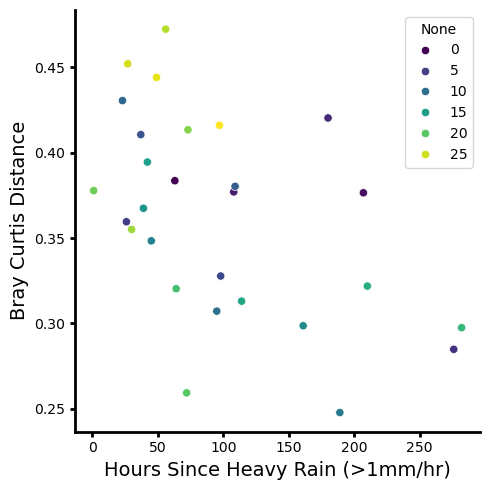

In [124]:
fig, ax = plt.subplots(figsize=(5, 5))
fig.patch.set_facecolor("white")
ax = sns.scatterplot(
    data=long_plot_df,
    x=long_plot_df["Time Since Rain"].dt.total_seconds() / 3600,
    y="distance",
    hue=long_plot_df.index,
    palette="viridis",
)
plt.xlabel("Hours Since Heavy Rain (>1mm/hr)", fontsize=14)
plt.ylabel("Bray Curtis Distance", fontsize=14)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
# ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(
    fontsize=10,
)  # rotation=90
plt.yticks(fontsize=10)
# plt.ylim(-.02,1)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line],
#      full_meta_data['plate.pos'][line], horizontalalignment='left',
#      size='medium', color='black', weight='semibold')

In [58]:
soil_samples.loc[soil_samples["Sample"] == "t27_soil"]

,Sample,sample.type,timepoint,date,time,platename,daysincestart,plantID,Kingdom,Phylum,Class,Order,Family,Genus,Species,AbundR100
1372,t27_soil,soil,t27,3/12/24,8:00,LIC_04,132,t27_soil,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,6.2
1664,t27_soil,soil,t27,3/12/24,8:00,LIC_04,132,t27_soil,d__Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales_B_877923,Flavobacteriaceae,Flavobacterium,Flavobacterium chilense,5.2
2084,t27_soil,soil,t27,3/12/24,8:00,LIC_04,132,t27_soil,d__Bacteria,Pseudomonadota,Gammaproteobacteria,Burkholderiales,Burkholderiaceae_A_595421,Hylemonella,Ramlibacter terrae,4.3
2477,t27_soil,soil,t27,3/12/24,8:00,LIC_04,132,t27_soil,d__Bacteria,Actinomycetota,Actinomycetes,Mycobacteriales,Geodermatophilaceae,Blastococcus,Blastococcus massiliensis,3.7
2709,t27_soil,soil,t27,3/12/24,8:00,LIC_04,132,t27_soil,d__Bacteria,Pseudomonadota,Gammaproteobacteria,Burkholderiales,Burkholderiaceae_A_595421,Paucimonas,Paucimonas lemoignei,3.4
3897,t27_soil,soil,t27,3/12/24,8:00,LIC_04,132,t27_soil,d__Bacteria,Pseudomonadota,Gammaproteobacteria,Burkholderiales,Burkholderiaceae_A_595421,Herminiimonas_567389,Herminiimonas arsenicoxydans,2.5
3971,t27_soil,soil,t27,3/12/24,8:00,LIC_04,132,t27_soil,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Rhizobiales_505101,Xanthobacteraceae,Bradyrhizobium_503372,Bradyrhizobium sp000938255,2.4
4061,t27_soil,soil,t27,3/12/24,8:00,LIC_04,132,t27_soil,d__Bacteria,Pseudomonadota,Gammaproteobacteria,Burkholderiales,Burkholderiaceae_A_595421,Massilia_574544,Massilia atriviolacea,2.3
4584,t27_soil,soil,t27,3/12/24,8:00,LIC_04,132,t27_soil,d__Bacteria,Actinomycetota,Thermoleophilia,Solirubrobacterales,Solirubrobacteraceae,Solirubrobacter,Solirubrobacter soli,2.1
4757,t27_soil,soil,t27,3/12/24,8:00,LIC_04,132,t27_soil,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Rhizobiales_505101,Rhizobiaceae,Neorhizobium_500197,Neorhizobium soli,2.0


In [46]:
genus_sum = (
    soil_samples[["Sample", "Genus", "AbundR100"]].groupby(["Sample", "Genus"]).sum()
)
genus_sum = genus_sum.reset_index()
genus_sum

,Sample,Genus,AbundR100
0,c1_t01_soil,Actinomycetospora,0.9
1,c1_t01_soil,Actinoplanes,2.2
2,c1_t01_soil,Aeromicrobium,0.5
3,c1_t01_soil,Amycolatopsis_D_380379,0.8
4,c1_t01_soil,Aquabacterium_A_592457,0.9
...,...,...,...
2254,t28_soil,UBA5216,1.8
2255,t28_soil,VAYN01,1.4
2256,t28_soil,Variovorax,1.2
2257,t28_soil,Virgisporangium,0.8


In [47]:
soil_samples_meta = soil_samples.drop_duplicates(subset=["Sample", "Genus"])
soil_samples_meta

,Sample,sample.type,timepoint,date,time,platename,daysincestart,plantID,Kingdom,Phylum,Class,Order,Family,Genus,Species,AbundR100
53,c1_t08_soil,soil,c1_t08,2/11/24,0:00,LICCIRC_02,102,c1_t08_soil,d__Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales_B_877923,Flavobacteriaceae,Flavobacterium,Flavobacterium chilense,36.0
63,t23_soil,soil,t23,2/26/24,8:00,LIC_03,117,t23_soil,d__Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales_B_877923,Flavobacteriaceae,Flavobacterium,Flavobacterium chilense,34.5
104,c1_t03_soil,soil,c1_t03,2/10/24,4:00,LICCIRC_01,101,c1_t03_soil,d__Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales_B_877923,Flavobacteriaceae,Flavobacterium,Flavobacterium chilense,30.9
142,c2_t12_soil,soil,c2_t12,3/3/24,16:00,LICCIRC_04,123,c2_t12_soil,d__Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales_B_877923,Flavobacteriaceae,Flavobacterium,Flavobacterium chilense,27.9
145,c1_t12_soil,soil,c1_t12,2/11/24,16:00,LICCIRC_02,102,c1_t12_soil,d__Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales_B_877923,Flavobacteriaceae,Flavobacterium,Flavobacterium chilense,27.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16862,c1_t09_soil,soil,c1_t09,2/11/24,4:00,LICCIRC_02,102,c1_t09_soil,d__Bacteria,Actinomycetota,Actinomycetes,Mycobacteriales,Pseudonocardiaceae,Pseudonocardia,Pseudonocardia hierapolitana,0.5
16863,c1_t09_soil,soil,c1_t09,2/11/24,4:00,LICCIRC_02,102,c1_t09_soil,d__Bacteria,Actinomycetota,Actinomycetes,Mycobacteriales,Nakamurellaceae,Nakamurella,Nakamurella deserti,0.5
16876,c1_t02_soil,soil,c1_t02,2/10/24,0:00,LICCIRC_01,101,c1_t02_soil,d__Bacteria,Actinomycetota,Actinomycetes,Mycobacteriales,Cryptosporangiaceae,Cryptosporangium,Cryptosporangium arvum,0.5
16877,t07_soil,soil,t07,12/1/23,8:00,LIC_01,30,t07_soil,d__Bacteria,Actinomycetota,Actinomycetes,Propionibacteriales,Kribbellaceae,Kribbella,Kribbella swartbergensis,0.5


In [48]:
genus_sum

,Sample,Genus,AbundR100
0,c1_t01_soil,Actinomycetospora,0.9
1,c1_t01_soil,Actinoplanes,2.2
2,c1_t01_soil,Aeromicrobium,0.5
3,c1_t01_soil,Amycolatopsis_D_380379,0.8
4,c1_t01_soil,Aquabacterium_A_592457,0.9
...,...,...,...
2254,t28_soil,UBA5216,1.8
2255,t28_soil,VAYN01,1.4
2256,t28_soil,Variovorax,1.2
2257,t28_soil,Virgisporangium,0.8


In [49]:
genus_sum_w_tp = genus_sum.merge(
    soil_samples_meta[["Sample", "timepoint", "date", "time", "Genus"]],
    left_on=["Sample", "Genus"],
    right_on=["Sample", "Genus"],
)
all_present_genus = genus_sum_w_tp["Genus"].unique()

In [50]:
genus_sum_w_tp

,Sample,Genus,AbundR100,timepoint,date,time
0,c1_t01_soil,Actinomycetospora,0.9,c1_t01,2/9/24,20:00
1,c1_t01_soil,Actinoplanes,2.2,c1_t01,2/9/24,20:00
2,c1_t01_soil,Aeromicrobium,0.5,c1_t01,2/9/24,20:00
3,c1_t01_soil,Amycolatopsis_D_380379,0.8,c1_t01,2/9/24,20:00
4,c1_t01_soil,Aquabacterium_A_592457,0.9,c1_t01,2/9/24,20:00
...,...,...,...,...,...,...
2254,t28_soil,UBA5216,1.8,t28,3/14/24,8:00
2255,t28_soil,VAYN01,1.4,t28,3/14/24,8:00
2256,t28_soil,Variovorax,1.2,t28,3/14/24,8:00
2257,t28_soil,Virgisporangium,0.8,t28,3/14/24,8:00


In [51]:
empty_df_to_add

,Sample,Genus,AbundR100,timepoint,date,time


In [54]:
## Need to fill in missing genus in every sample first
for sampID in genus_sum_w_tp["Sample"].unique():
    sampid_only_df = genus_sum_w_tp.loc[genus_sum_w_tp["Sample"] == sampID]
    present_genus_in_samp = sampid_only_df["Genus"].unique()
    difference_in_present_bacteria = list(
        set(all_present_genus) - set(present_genus_in_samp)
    )
    current_time_point = sampid_only_df["timepoint"].iloc[0]
    empty_df_to_add = pd.DataFrame(
        columns=["Sample", "Genus", "AbundR100", "timepoint", "date", "time"]
    )
    empty_df_to_add["Genus"] = difference_in_present_bacteria
    empty_df_to_add["Sample"] = sampID
    empty_df_to_add["AbundR100"] = 0
    empty_df_to_add["timepoint"] = current_time_point
    empty_df_to_add["date"] = sampid_only_df["date"].iloc[0]
    empty_df_to_add["time"] = sampid_only_df["time"].iloc[0]
    genus_sum_w_tp = pd.concat([genus_sum_w_tp, empty_df_to_add], axis=0)

In [57]:
genus_sum_w_tp.head(50)

,Sample,Genus,AbundR100,timepoint,date,time
0,c1_t01_soil,Actinomycetospora,0.9,c1_t01,2/9/24,20:00
1,c1_t01_soil,Actinoplanes,2.2,c1_t01,2/9/24,20:00
2,c1_t01_soil,Aeromicrobium,0.5,c1_t01,2/9/24,20:00
3,c1_t01_soil,Amycolatopsis_D_380379,0.8,c1_t01,2/9/24,20:00
4,c1_t01_soil,Aquabacterium_A_592457,0.9,c1_t01,2/9/24,20:00
5,c1_t01_soil,Arthrobacter_E_385777,0.8,c1_t01,2/9/24,20:00
6,c1_t01_soil,Blastococcus,3.6,c1_t01,2/9/24,20:00
7,c1_t01_soil,Bradyrhizobium_503372,2.2,c1_t01,2/9/24,20:00
8,c1_t01_soil,Caballeronia,1.2,c1_t01,2/9/24,20:00
9,c1_t01_soil,Flavobacterium,6.5,c1_t01,2/9/24,20:00


In [ ]:
ssd.braycurtis()